# **Автоматическая иллюстрация художественных произведений**

Для начала прописываем итератор, который считывает заданное количество абзацей в текстовом файле и возвращает абзац в виде строки вместе с количеством строк. Чтобы понять когда заканчивается абзац, мы проверяем равна ли новая строка знаку '\n'. **Данный метод может не работать для текстовых файлов с разных источников.**

In [ ]:
def text_iterator(file, paragraph_num):  
  buff = ''
  lines_counter = 0
  EOL_counter = 0

  while True:
    line = file.readline()
    
    if line == '\n':
      EOL_counter += 1

      if EOL_counter == paragraph_num:
        yield buff, lines_counter
        buff = ''
        lines_counter = 0
        EOL_counter = 0

    else:
      
      if line:
        lines_counter += 1
        buff += line
        
      else: # if not line => end of file => break loop
          yield buff, lines_counter
          break
  
  f.close()

f = open('chapter1.txt', "r", encoding="utf8")

for i in text_iterator(f, 2):
  print(i)

('The studio was filled with the rich odour of roses, and when the light\nsummer wind stirred amidst the trees of the garden, there came through\nthe open door the heavy scent of the lilac, or the more delicate\nperfume of the pink-flowering thorn.\nFrom the corner of the divan of Persian saddle-bags on which he was\nlying, smoking, as was his custom, innumerable cigarettes, Lord Henry\nWotton could just catch the gleam of the honey-sweet and honey-coloured\nblossoms of a laburnum, whose tremulous branches seemed hardly able to\nbear the burden of a beauty so flamelike as theirs; and now and then\nthe fantastic shadows of birds in flight flitted across the long\ntussore-silk curtains that were stretched in front of the huge window,\nproducing a kind of momentary Japanese effect, and making him think of\nthose pallid, jade-faced painters of Tokyo who, through the medium of\nan art that is necessarily immobile, seek to convey the sense of\nswiftness and motion. The sullen murmur of the b

Далее прописываем фукнцию *Summarize* которая принимает строку и число предложений к которому должны сократить переданную строку. Для этого мы используем готовую модель **Meaning Cloud** где отправляем нужный запрос и получаем готовый ответ. Чтобы получить ключ следует зарегстрироваться на офицальном [сайте](https://www.meaningcloud.com/). 


In [ ]:
import requests

txt = 'Puss in Boots, Jr., ran up and, with the help of his cane, pried the boards apart so that the little pig could just squeeze himself through. "Squeak, squeak! Oh, thank you!" cried the little fellow. "I wish Icould do something to repay you!"'


def summarize(txt, num_of_sentences):
  url = "https://api.meaningcloud.com/summarization-1.0"

  if not type(num_of_sentences) == str:
    num_of_sentences = str(num_of_sentences)

  payload={
      'key': '',
      'txt': txt,
      'sentences': num_of_sentences
  }

  response = requests.post(url, data=payload)
  print(response)
  return response.json()

summarize(txt, '1')

<Response [200]>


{'status': {'code': '0',
  'msg': 'OK',
  'credits': '1',
  'remaining_credits': '18612'},
 'summary': 'Puss in Boots, Jr., ran up and, with the help of his cane, pried the boards apart so that the little pig could just squeeze himself through.'}

Теперь нам надо импортировать библиотеки для работы со **Stable Diffusion**, чтобы иллюстрировать наши сокращенные абзацы.

In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 524 kB 35.3 MB/s 
     |████████████████████████████████| 182 kB 78.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 30.9 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 191 kB 79.0 MB/s 
     |████████████████████████████████| 7.6 MB 49.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 12.4 MB/s 


Далее для работы со **Stable Diffusion** следует зарегестрироваться на [HuggingFace.co](http://HuggingFace.co) и ввести ниже Access Token.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


Установка **Stable Diffusion**.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Функция для отображения нескольких изображений.

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

Проверка работы **Stable Diffusion**. 

  0%|          | 0/50 [00:00<?, ?it/s]

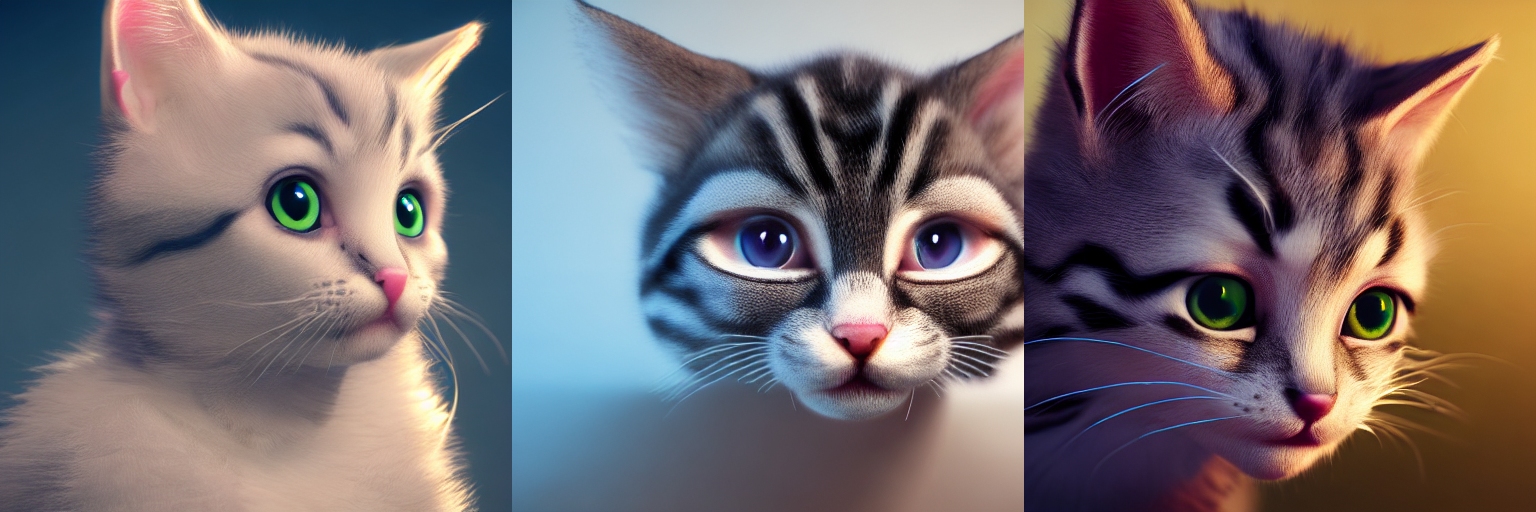

In [ ]:
from torch import autocast 
num_images = 3

height, width = 512, 512

prompt = ["kitten , high quality, cinematic, volumetric light, 3D, Super detailed, hypperrealistic, octane render, FKAA, TXAA, RTX, HDR"] * num_images

with autocast("cuda"):
  images = pipe(prompt,height=height,width=width)["images"] # horizontal

grid = image_grid(images, rows=1, cols=3)
grid

Главная функция *illustrate*, которая использует итератор выше чтобы пройтись по абзацам файла и также функцию summarize чтобы получить краткую версию абзаца(prompt) для Stable Diffusion. Далее мы генерируем изображения и сохраняем на диск Colab. 

**Note:** использование 4 и более предложений для promt бессмысленно т.к. модель может обработать не более 77 токенов, что примерно равно 2-3 предложениям. Также добавление стилей может быть не эффективным. 

В последний раз при запуске стала появляться ошибка 505, хотя ранее ее не было.
Возможно какие-то проблемы с серверами Meaning Cloud.

In [ ]:
STYLES = [' High quality', 'cinematic', '3D', 'Super detailed', 'hypperrealistic']

def illustrate(dir):
  i = 0
  num_of_pars = 2 # number of paragraphs yielded from textIterator
  num_of_sent = 3 # number of sentences after summurazing
  f = open(dir, "r", encoding="utf8")

  for par in text_iterator(f, num_of_pars):

    if i == 21:
      break

    if par[1] > 3:   # if one or more pars <= 3 then we should not consider them 

      summ = summarize(par[0], num_of_sent)['summary']
      
      #summ = summ +  ', '.join(STYLES) # adding styles or marks to prompt
      print(summ)
    
      prompt = [summ] * 3

      with autocast("cuda"):
        images = pipe(prompt, height=height, width=width)["images"]
      grid = image_grid(images, rows=1, cols=3)
      grid.save(str(i) + '.jpg')
      i += 1

illustrate('part1.txt')


<Response [200]>
Puss had made a great discovery in the garret. It seems strange that he should have found something more important than a rat or mouse, but he had. From the moment he had seen the picture-book he was a changed cat!


  0%|          | 0/50 [00:00<?, ?it/s]

<Response [200]>
It was the story of "Puss in Boots," and on the cover was a beautiful picture of a cat wearing a magnificent pair of boots with shiny red tops. Puss sat down and opened the book. [...] He looked around to see if he could find a pair of boots like those in the picture.


  0%|          | 0/50 [00:00<?, ?it/s]

<Response [502]>


JSONDecodeError: ignored

Удобно будет сжать все изображения в один архив и скачать.

In [ ]:
!zip res.zip *.jpg

updating: 0.jpg (deflated 0%)
updating: 10.jpg (deflated 0%)
updating: 11.jpg (deflated 0%)
updating: 12.jpg (deflated 0%)
updating: 13.jpg (deflated 0%)
updating: 14.jpg (deflated 0%)
updating: 15.jpg (deflated 0%)
updating: 16.jpg (deflated 0%)
updating: 17.jpg (deflated 0%)
updating: 18.jpg (deflated 0%)
updating: 19.jpg (deflated 0%)
updating: 1.jpg (deflated 0%)
updating: 20.jpg (deflated 0%)
updating: 2.jpg (deflated 1%)
updating: 3.jpg (deflated 0%)
updating: 4.jpg (deflated 0%)
updating: 5.jpg (deflated 0%)
updating: 6.jpg (deflated 0%)
updating: 7.jpg (deflated 0%)
updating: 8.jpg (deflated 0%)
updating: 9.jpg (deflated 0%)
